In [1]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
from skopt.learning import ExtraTreesRegressor
from skopt import Optimizer
from skopt.plots import plot_gaussian_process

In [10]:
noise_level = 0.1

# Our 1D toy problem, this is the function we are trying to
# minimize
def objective(x, noise_level=noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) + np.random.randn() * noise_level


def objective_wo_noise(x):
    return objective(x, noise_level=0)

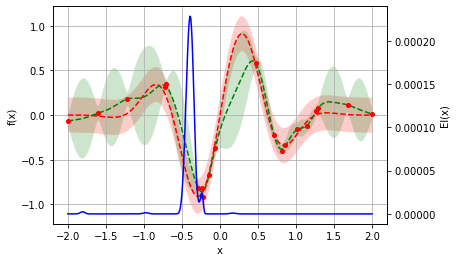

In [21]:
plot_args = {"objective": objective_wo_noise,
             "noise_level": noise_level, "show_legend": False,
             "show_title": False, "show_next_point": False,
             "show_acq_func": True}

opt = Optimizer([(-2.0, 2.0)], base_estimator="GP", n_initial_points=3, acq_func='EI')

for i in range(20):
    next_x = opt.ask()
    f_val = objective(next_x)
    opt.tell(next_x, f_val)
# The same output could be created with opt.run(objective, n_iter=30)
_ = plot_gaussian_process(opt.get_result(), **plot_args)